In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2

df_test = pd.read_csv('/home/yandex/igor/data_eyes/tags_57_71_const_genome.csv', sep=';')
df_test = df_test[df_test.const_left!= -1]
df_test = df_test[df_test.const_right!= -1]
df_test = df_test[df_test.const_left!= float('inf')]
df_test = df_test[df_test.const_right!= float('inf')]
df_test

,basename,light_lighting,light_background,light_exposure,light_color,emotion,eyes_left,eyes_right,headwear,camera,blur,low_resolution,object,filename,const_left,const_right,genome
0,bbdcd248-4429-4248-b1b7-a308f6d8daff.mp4.0010.jpg,1,1,0,0,0,0,0,0,0,0,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,0.21,0.24,african
1,bbdcd248-4429-4248-b1b7-a308f6d8daff.mp4.0004.jpg,1,1,0,0,0,0,0,0,0,0,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,0.23,0.26,african
2,bbdcd248-4429-4248-b1b7-a308f6d8daff.mp4.0002.jpg,1,1,0,0,0,0,0,0,0,0,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,0.24,0.22,african
3,bbb2dd8f-8262-452c-bb95-4ded2800b538.mp4.0034.jpg,0,0,0,0,0,0,0,0,0,6,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,0.29,0.25,african
4,bbb2dd8f-8262-452c-bb95-4ded2800b538.mp4.0024.jpg,0,0,0,0,0,0,0,0,0,6,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,0.29,0.22,african
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,ed8646f2-39e8-4810-9292-4d6d3bc318f4.quicktime...,1,0,0,0,0,0,0,0,0,4,2,0,/mnt/data/frames/new_test/frames_6_origami_ext...,0.17,0.17,european
4079,ed8646f2-39e8-4810-9292-4d6d3bc318f4.quicktime...,1,0,0,0,0,0,0,0,0,6,2,0,/mnt/data/frames/new_test/frames_6_origami_ext...,0.24,0.23,african
4080,ed42426f-f344-4735-a395-586d3290edb0.mp4.0030.jpg,1,0,0,0,0,-6,-6,0,0,6,1,1,/mnt/data/frames/new_test/frames_6_origami_ext...,0.31,0.31,european
4081,ed42426f-f344-4735-a395-586d3290edb0.mp4.0027.jpg,1,0,0,0,0,-6,-6,0,0,6,1,1,/mnt/data/frames/new_test/frames_6_origami_ext...,0.27,0.24,european


In [3]:
"""
eyes_left/eyes_right

0	Глаза нормально открыты, взгляд прямо (хорошо видна радужная оболочка)
-6	Оба глаза полностью закрыты объектом или тенью (невозможно оценить открытость)
-5	Глаза (веки) полностью закрыты, радужная оболочка не видна
-4	Один глаз полностью закрыт объектом или тенью (невозможно оценить открытость)
-3	Один глаз (веки) закрыт, другой открыт
-2	Есть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)
-1	Нависшие веки у пожилых
1	Глаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие
2	Глаза выпучены (могут идти в комплекте с поднятыми бровями)

"""

'\neyes_left/eyes_right\n\n0\tГлаза нормально открыты, взгляд прямо (хорошо видна радужная оболочка)\n-6\tОба глаза полностью закрыты объектом или тенью (невозможно оценить открытость)\n-5\tГлаза (веки) полностью закрыты, радужная оболочка не видна\n-4\tОдин глаз полностью закрыт объектом или тенью (невозможно оценить открытость)\n-3\tОдин глаз (веки) закрыт, другой открыт\n-2\tЕсть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)\n-1\tНависшие веки у пожилых\n1\tГлаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие\n2\tГлаза выпучены (могут идти в комплекте с поднятыми бровями)\n\n'

In [4]:
"""
emotion (выражение лица)

0	Губы ровно
-1	Рот закрыт объектом и губы не видно (например, медицинской маской), невозможно оценить 
1	Рот закрыт, уголок/уголки опущены или один уголок приподнят (хмурое или недовольное лицо)
2	Рот закрыт, уголки приподняты (улыбка с закрытым ртом)
3	Рот открыт, уголки приподняты (улыбка с открытым ртом)
4	Рот открыт (может идти в компекте с приподнятыми бровями или высунутым языком)

"""

'\nemotion (выражение лица)\n\n0\tГубы ровно\n-1\tРот закрыт объектом и губы не видно (например, медицинской маской), невозможно оценить \n1\tРот закрыт, уголок/уголки опущены или один уголок приподнят (хмурое или недовольное лицо)\n2\tРот закрыт, уголки приподняты (улыбка с закрытым ртом)\n3\tРот открыт, уголки приподняты (улыбка с открытым ртом)\n4\tРот открыт (может идти в компекте с приподнятыми бровями или высунутым языком)\n\n'

In [5]:
"""
headwear (головной убор)

0	Нет головного убора
1	Есть допустимый (религиозный) головной убор (например, хиджаб или женский платок на голову, тюрбан, чалма)
2	Есть головной убор (религиозным не является). Например, шапка, капюшон, наушники и другие.

"""

'\nheadwear (головной убор)\n\n0\tНет головного убора\n1\tЕсть допустимый (религиозный) головной убор (например, хиджаб или женский платок на голову, тюрбан, чалма)\n2\tЕсть головной убор (религиозным не является). Например, шапка, капюшон, наушники и другие.\n\n'

In [6]:
"""
object (Объект на лице)

################################################################################################################
Зоны без основных контрольных точек		
1 - 	Внешняя часть лица: лоб, подбородок, уши (только для наушников) и контур лица (узкая полоса).	
2 - 	Внутренняя часть лица: щеки, скулы, область вокруг глаз, область вокруг губ.	
Зоны с основными контрольными точками		
3 - 	Рот	
4 - 	Нос	
5 - 	Глаза (по стандарту + еще небольшая полоса над краем верхнего века)	
		
Верхняя граница между 1 и 2 проходит по бровям (брови можно отнести к 1, если они не нависают прямо над глазами)		
Нижняя граница между 1 и 2 проходит примерно по середине подбородка		
#################################################################################################################

0	Зоны 1-5 не содержат никаких объектов	
1	Объект попадает в зону 1	
2	Объект попадает в зону 2	
3	Объект попадает в зону 3	
4	Объект попадает в зону 4	
5	Объект попадает в зону 5

"""

'\nobject (Объект на лице)\n\n################################################################################################################\nЗоны без основных контрольных точек\t\t\n1 - \tВнешняя часть лица: лоб, подбородок, уши (только для наушников) и контур лица (узкая полоса).\t\n2 - \tВнутренняя часть лица: щеки, скулы, область вокруг глаз, область вокруг губ.\t\nЗоны с основными контрольными точками\t\t\n3 - \tРот\t\n4 - \tНос\t\n5 - \tГлаза (по стандарту + еще небольшая полоса над краем верхнего века)\t\n\t\t\nВерхняя граница между 1 и 2 проходит по бровям (брови можно отнести к 1, если они не нависают прямо над глазами)\t\t\nНижняя граница между 1 и 2 проходит примерно по середине подбородка\t\t\n#################################################################################################################\n\n0\tЗоны 1-5 не содержат никаких объектов\t\n1\tОбъект попадает в зону 1\t\n2\tОбъект попадает в зону 2\t\n3\tОбъект попадает в зону 3\t\n4\tОбъект попадает в зону 4\t

In [7]:
"""
low_resolution

0	Изображение хорошего разрешения (пиксели не видны)
1	Изображение зернистое, пиксели видны, но не сильно заметны	
2	Пиксельное изображение (пиксели сильно заметны)

"""

'\nlow_resolution\n\n0\tИзображение хорошего разрешения (пиксели не видны)\n1\tИзображение зернистое, пиксели видны, но не сильно заметны\t\n2\tПиксельное изображение (пиксели сильно заметны)\n\n'

In [8]:
"""
camera (дефект камеры)

0	Нет никаких дефектов
1	Изображение вытянуто в ширину или высоту (нарушены пропорции)
2	Есть дефект камеры, но он не закрывает лицо (например, полоса внизу, трещинка в углу и т.п.	
3	Небольшие полосы или другие артефакты, закрывающие лицо
4	Широкие полосы или другие артефакты, разбитый объектив (лицо трудно/невозможно рассмотреть), закрыта большая часть кадра.

"""

'\ncamera (дефект камеры)\n\n0\tНет никаких дефектов\n1\tИзображение вытянуто в ширину или высоту (нарушены пропорции)\n2\tЕсть дефект камеры, но он не закрывает лицо (например, полоса внизу, трещинка в углу и т.п.\t\n3\tНебольшие полосы или другие артефакты, закрывающие лицо\n4\tШирокие полосы или другие артефакты, разбитый объектив (лицо трудно/невозможно рассмотреть), закрыта большая часть кадра.\n\n'

In [9]:
"""
blur (размытость)

0	Нет размытости, четкое изображение	
1	Изображение размытое, мутное, не в фокусе	
2	Размыта часть изображения, попадающая на лицо (как будто капнули воду на акварельную картину). Например, из-за жирного пятна на объективе.
3	Кадр четкий, но есть размытый объект, заходящий на лицо (например, рука, голова или другой объект в движении)
4	Кадр нечеткий, как будто двоится, размытость из-за движения объекта или камеры.	
5	На изображении есть "туман", белесая пелена из-за яркого освещения или замыленность	
6	Изображение подозрительное, но точно определить тип нечеткости не удается.

"""

'\nblur (размытость)\n\n0\tНет размытости, четкое изображение\t\n1\tИзображение размытое, мутное, не в фокусе\t\n2\tРазмыта часть изображения, попадающая на лицо (как будто капнули воду на акварельную картину). Например, из-за жирного пятна на объективе.\n3\tКадр четкий, но есть размытый объект, заходящий на лицо (например, рука, голова или другой объект в движении)\n4\tКадр нечеткий, как будто двоится, размытость из-за движения объекта или камеры.\t\n5\tНа изображении есть "туман", белесая пелена из-за яркого освещения или замыленность\t\n6\tИзображение подозрительное, но точно определить тип нечеткости не удается.\n\n'

light_lighting


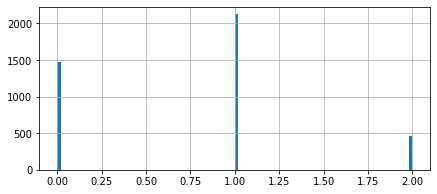



light_background


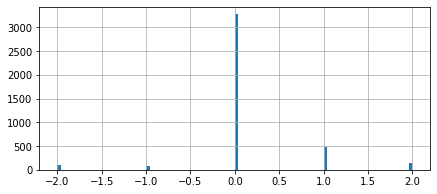



light_exposure


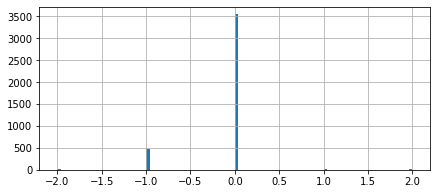



light_color


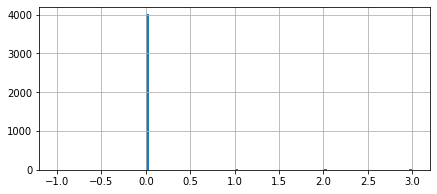



emotion


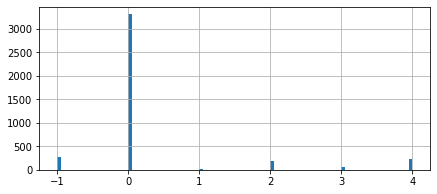



eyes_left


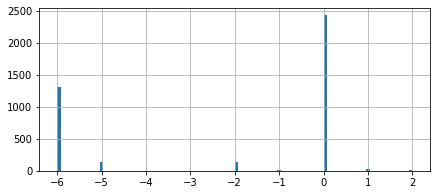



eyes_right


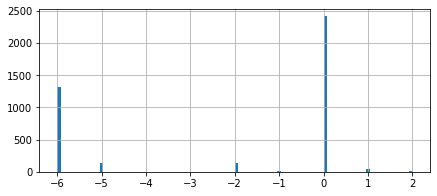



headwear


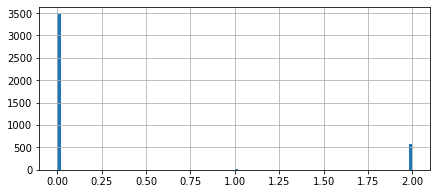



camera


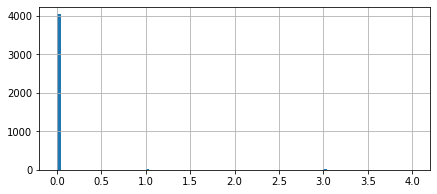



blur


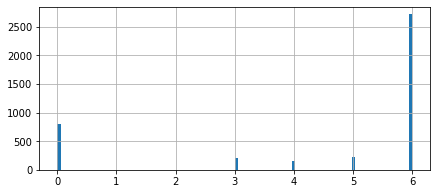



low_resolution


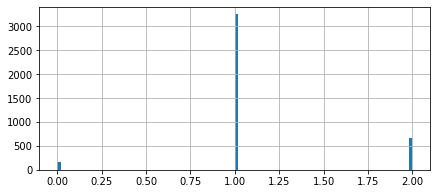



object


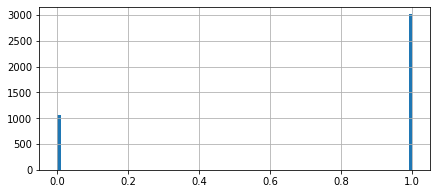



genome


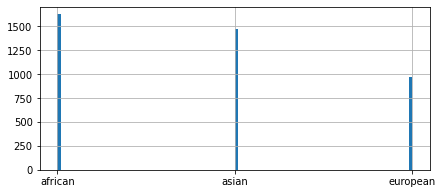

In [10]:
for i in list(df_test.columns.values):
    if i != 'basename' and i != 'filename' and i != 'const_left' and i != 'const_right':
        print(i)
        df_test[i].hist(bins = 100, figsize = (7, 3))
        plt.show()
        print('\n')


In [11]:
def select_data(df_select, eyes=True, normalize=True, podium=True, two_faces=True):

    if two_faces:
        df_select = df_select[df_select.const_left!=-1]
        df_select = df_select[df_select.const_right!=-1]

    if eyes:        
        df_select = df_select[df_select.eyes_left!=-6]
        df_select = df_select[df_select.eyes_right!=-6]
        df_select = df_select[df_select.eyes_left!=-4]
        df_select = df_select[df_select.eyes_right!=-4]
        df_select = df_select[df_select.eyes_left!=-1]
        df_select = df_select[df_select.eyes_right!=-1]

    if podium:
        df_select = df_select[df_select.light_lighting!=2]
        df_select = df_select[df_select.light_background!=-2]
        df_select = df_select[df_select.light_background!=-1]
        df_select = df_select[df_select.light_background!=2]
        df_select = df_select[df_select.light_exposure!=2]
        df_select = df_select[df_select.light_exposure!=-2]
        df_select = df_select[df_select.light_color!=3]



        df_select = df_select[df_select.camera!=3]
        df_select = df_select[df_select.camera!=4]

        df_select = df_select[df_select.blur!=2]
        df_select = df_select[df_select.blur!=3]
        df_select = df_select[df_select.blur!=4]
        df_select = df_select[df_select.blur!=5]
        #df_select = df_select[df_select.blur!=6]

        df_select = df_select[df_select.low_resolution!=2]
        #df_select = df_select[df_select.low_resolution!=1]

        #df_select = df_select[df_select.object!=1]

    if normalize:
        df_select['const_left']=df_select['const_left']-min(df_select.const_left)
        df_select['const_right']=df_select['const_right']-min(df_select.const_right)

        df_select['const_left']=(df_select['const_left']/max(df_select.const_left)*9).astype('int')
        df_select['const_right']=(df_select['const_right']/max(df_select.const_right)*9).astype('int')
    
    return df_select

df_select = select_data(df_test)
df_select


,basename,light_lighting,light_background,light_exposure,light_color,emotion,eyes_left,eyes_right,headwear,camera,blur,low_resolution,object,filename,const_left,const_right,genome
0,bbdcd248-4429-4248-b1b7-a308f6d8daff.mp4.0010.jpg,1,1,0,0,0,0,0,0,0,0,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,4,5,african
1,bbdcd248-4429-4248-b1b7-a308f6d8daff.mp4.0004.jpg,1,1,0,0,0,0,0,0,0,0,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,4,6,african
2,bbdcd248-4429-4248-b1b7-a308f6d8daff.mp4.0002.jpg,1,1,0,0,0,0,0,0,0,0,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,4,5,african
3,bbb2dd8f-8262-452c-bb95-4ded2800b538.mp4.0034.jpg,0,0,0,0,0,0,0,0,0,6,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,5,5,african
4,bbb2dd8f-8262-452c-bb95-4ded2800b538.mp4.0024.jpg,0,0,0,0,0,0,0,0,0,6,1,1,/mnt/data/frames/new_test/frames_1_origami_ext...,5,5,african
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,edd8d8d3-a8b5-4b45-b533-b67023a8290f.mp4.0018.jpg,0,0,0,0,0,-5,-5,0,0,0,1,1,/mnt/data/frames/new_test/frames_6_origami_ext...,0,0,african
4067,edd8d8d3-a8b5-4b45-b533-b67023a8290f.mp4.0015.jpg,0,0,0,0,0,0,0,0,0,0,1,1,/mnt/data/frames/new_test/frames_6_origami_ext...,6,7,african
4074,eda5fdae-6bdd-49e7-b18b-856a95be461b.mp4.0020.jpg,0,0,0,0,0,0,0,0,0,0,1,0,/mnt/data/frames/new_test/frames_6_origami_ext...,4,4,asian
4075,eda5fdae-6bdd-49e7-b18b-856a95be461b.mp4.0009.jpg,0,0,0,0,0,0,0,0,0,0,1,0,/mnt/data/frames/new_test/frames_6_origami_ext...,5,5,asian


<AxesSubplot:>

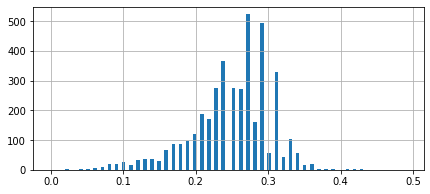

In [19]:
df_test['const_left'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

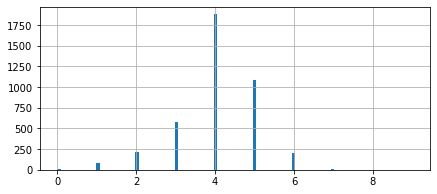

In [20]:
df_test_norm = select_data(df_test, eyes=False, normalize=True, podium=False, two_faces=False)
df_test_norm['const_left'].hist(bins = 100, figsize = (7, 3))

In [21]:
df_test_norm['const_left'].value_counts()

4    1879
5    1083
3     581
2     220
6     201
1      82
7      10
0       9
8       2
9       1
Name: const_left, dtype: int64

<AxesSubplot:>

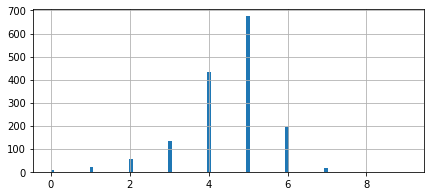

In [22]:
df_select['const_left'].hist(bins = 100, figsize = (7, 3))

In [23]:
df_select['const_left'].value_counts()

5    674
4    433
6    193
3    132
2     57
1     20
7     15
0      6
8      1
9      1
Name: const_left, dtype: int64

In [ ]:
"""
eyes_left/eyes_right

0	Глаза нормально открыты, взгляд прямо (хорошо видна радужная оболочка)
-6	Оба глаза полностью закрыты объектом или тенью (невозможно оценить открытость)
-5	Глаза (веки) полностью закрыты, радужная оболочка не видна
-4	Один глаз полностью закрыт объектом или тенью (невозможно оценить открытость)
-3	Один глаз (веки) закрыт, другой открыт
-2	Есть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)
-1	Нависшие веки у пожилых
1	Глаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие
2	Глаза выпучены (могут идти в комплекте с поднятыми бровями)

"""

<AxesSubplot:>

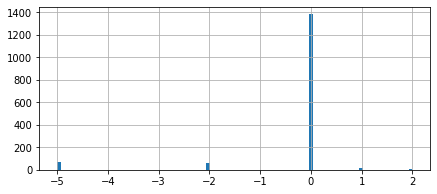

In [26]:
df_select['eyes_left'].hist(bins = 100, figsize = (7, 3))

In [28]:
df_select['eyes_left'].value_counts()

 0    1379
-5      73
-2      57
 1      17
 2       6
Name: eyes_left, dtype: int64

In [54]:
df_select_cp.iloc[5]

basename            bbb2dd8f-8262-452c-bb95-4ded2800b538.mp4.0011.jpg
light_lighting                                                      0
light_background                                                    0
light_exposure                                                      0
light_color                                                         0
emotion                                                             0
eyes_left                                                           0
eyes_right                                                          0
headwear                                                            0
camera                                                              0
blur                                                                6
low_resolution                                                      1
object                                                              1
filename            /mnt/data/frames/new_test/frames_1_origami_ext...
const_left          

In [43]:
df_select_cp = df_select.copy()

for ind, row in df_select_cp[df_select_cp['eyes_left']==-5].iterrows():
    print(ind)
    df_select_cp.iloc[ind, df_select_cp.columns.get_loc('const_left')] = 0
df_select_cp[df_select_cp['eyes_left']==-5]['const_left'].value_counts()

25
60
117
231
232
466
470
537
553
601
706
828
842
889
890
891
976
1149
1150
1153
1250
1351
1520
1552


IndexError: iloc cannot enlarge its target object

In [40]:
df_select_cp[df_select_cp['eyes_left']==-5]['const_left'].value_counts()

Series([], Name: const_left, dtype: int64)

In [29]:
#-5	Глаза (веки) полностью закрыты, радужная оболочка не видна
# значения констант при данном тэге разметки (должны быть все 0)
df_select[df_select['eyes_left']==-5]['const_left'].value_counts()

2    25
3    15
1    13
4    13
0     4
5     3
Name: const_left, dtype: int64

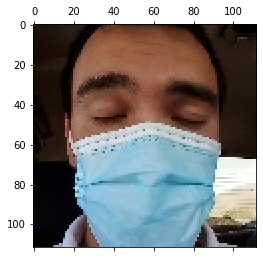

/mnt/data/frames/new_test/frames_1_origami_extended_0003_112/med_mask_1/ba007047-4f64-4b4a-bdd1-d70525edd524.mp4.0011.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




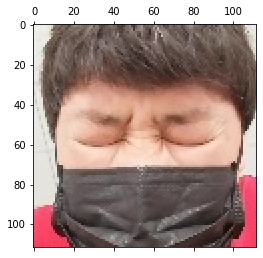

/mnt/data/frames/new_test/frames_1_origami_extended_0003_112/med_mask_1/b359f998-87d3-4dbe-99a2-07519120a814.mp4.0025.jpg
genome =  african
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




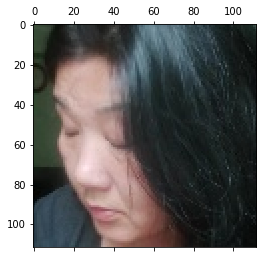

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/9445c332-47df-4ed5-90e3-0504bc354228.mp4.0027.jpg
genome =  african
const_left =  5
eyes_left =  -5
const_right =  3
eyes_right =  -5




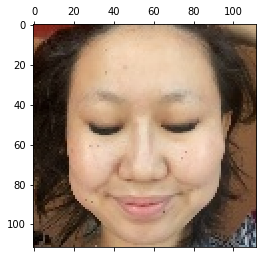

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/6681ce9b-4541-473f-b972-4fc68aa55fef.mp4.0014.jpg
genome =  african
const_left =  1
eyes_left =  -5
const_right =  2
eyes_right =  -5




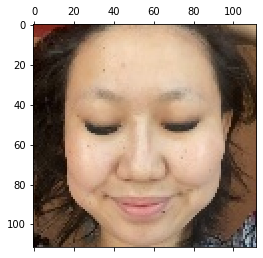

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/6681ce9b-4541-473f-b972-4fc68aa55fef.mp4.0013.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




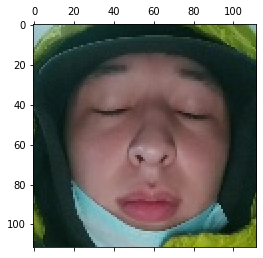

/mnt/data/frames/new_test/frames_1_origami_extended_0003_112/med_mask_1/c3ef9ea2-7dc0-414c-8bf8-8d15eadc1011.mp4.0025.jpg
genome =  european
const_left =  1
eyes_left =  -5
const_right =  1
eyes_right =  -5




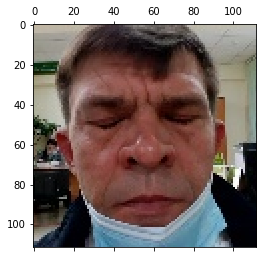

/mnt/data/frames/new_test/frames_1_origami_extended_0003_112/med_mask_1/c3bb1706-2765-4d8b-8b21-604076a47d2a.mp4.0013.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




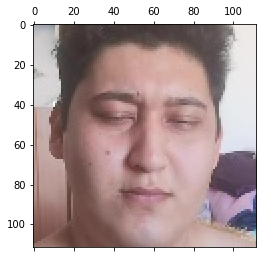

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/92303f29-3508-4680-990e-e9537953016e.mp4.0013.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -2




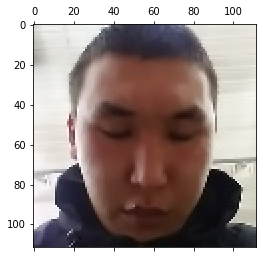

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/86780dc1-2f40-4773-8bdc-567fe949ab0e.mp4.0032.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




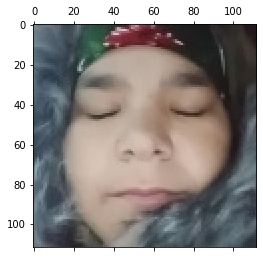

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/71627cb2-8201-43f3-9953-7df181977f87.mp4.0036.jpg
genome =  asian
const_left =  1
eyes_left =  -5
const_right =  0
eyes_right =  -5




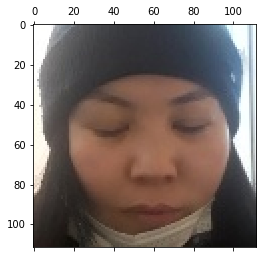

/mnt/data/frames/new_test/frames_1_origami_extended_0003_112/med_mask_1/d5eeaf25-04ed-4542-9abe-94650d39fab1.mp4.0021.jpg
genome =  african
const_left =  1
eyes_left =  -5
const_right =  0
eyes_right =  -5




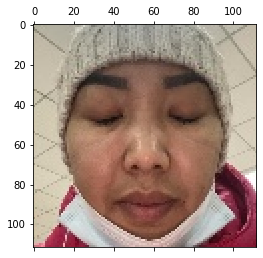

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/846818a4-c082-4207-bc6b-f861dc9c63aa.mp4.0014.jpg
genome =  asian
const_left =  1
eyes_left =  -5
const_right =  2
eyes_right =  -5




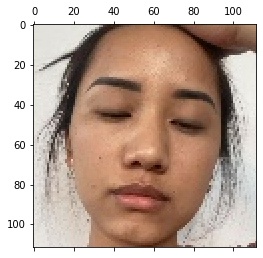

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/738808d1-a80e-429e-a3d0-5cc2e5193695.mp4.0014.jpg
genome =  asian
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




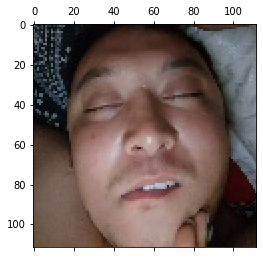

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/343383ea-da17-4afc-a691-bb856cf2d011.mp4.0031.jpg
genome =  european
const_left =  4
eyes_left =  -5
const_right =  4
eyes_right =  -5




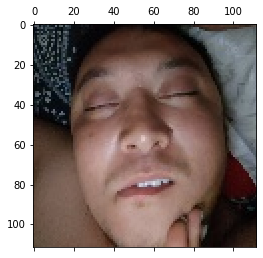

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/343383ea-da17-4afc-a691-bb856cf2d011.mp4.0010.jpg
genome =  european
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  -5




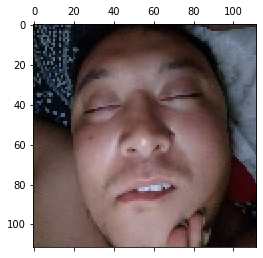

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/343383ea-da17-4afc-a691-bb856cf2d011.mp4.0001.jpg
genome =  european
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  -5




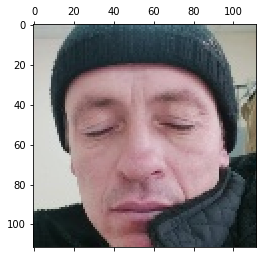

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/0982539b-0ca9-4f39-a7bd-7f43a4a0bd38.mp4.0032.jpg
genome =  asian
const_left =  3
eyes_left =  -5
const_right =  2
eyes_right =  -5




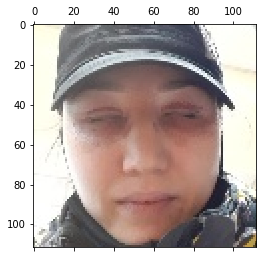

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/4970340f-e9e1-4689-b4ed-41c6b44c87f6.mp4.0039.jpg
genome =  african
const_left =  5
eyes_left =  -5
const_right =  5
eyes_right =  -5




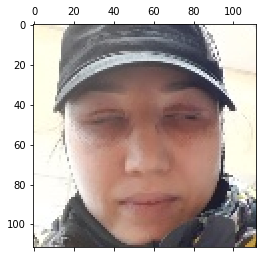

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/4970340f-e9e1-4689-b4ed-41c6b44c87f6.mp4.0035.jpg
genome =  african
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  -5




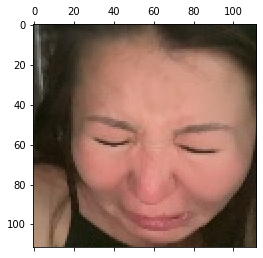

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/4899073f-5a49-4802-adc2-716ed7638f51.mp4.0031.jpg
genome =  african
const_left =  1
eyes_left =  -5
const_right =  0
eyes_right =  -5




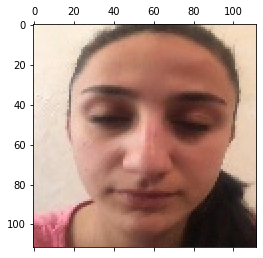

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/05028837-734c-4d08-8401-1408ece5efe4.mp4.0030.jpg
genome =  asian
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




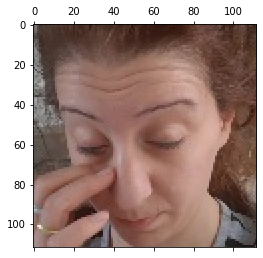

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/a75da782-617d-4b4c-a153-d5e9195cc702.mp4.0016.jpg
genome =  african
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




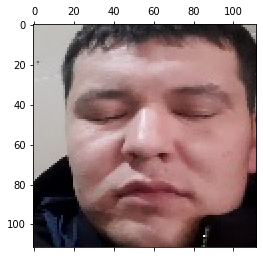

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/a11b8b4a-21fc-4c15-8241-e716b3f0c70b.quicktime.0002.jpg
genome =  asian
const_left =  1
eyes_left =  -5
const_right =  1
eyes_right =  -5




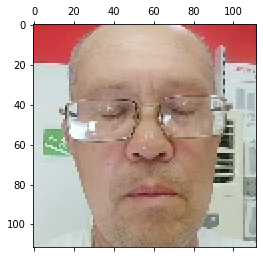

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/b0c5089c-ef34-4989-813f-af5840d529b2.mp4.0015.jpg
genome =  european
const_left =  5
eyes_left =  -5
const_right =  6
eyes_right =  -5




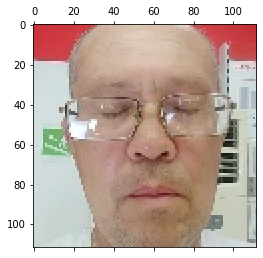

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/b0c5089c-ef34-4989-813f-af5840d529b2.mp4.0014.jpg
genome =  european
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  -5




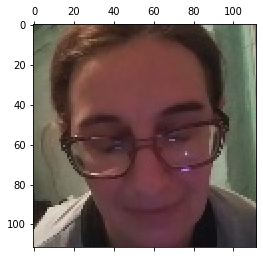

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/b00dc431-de7d-4d82-8766-06d8d19a1bba.mp4.0030.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




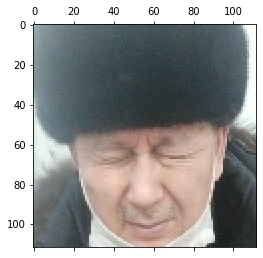

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/b9798d54-90a0-4479-983b-2647ee0e6dde.mp4.0027.jpg
genome =  african
const_left =  0
eyes_left =  -5
const_right =  0
eyes_right =  -5




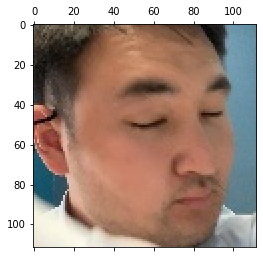

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/b7b2281f-9b2b-4a77-a4e6-be37e54db126.mp4.0010.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  5
eyes_right =  -5




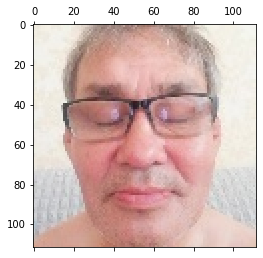

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/b0f024bd-9f72-4edf-9d24-717829166971.mp4.0028.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




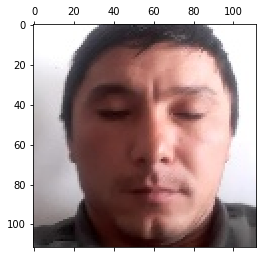

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/b0157504-9a58-48ab-a0ea-8ad802a2527e.quicktime.0029.jpg
genome =  asian
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




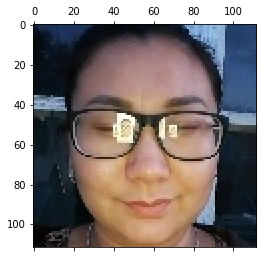

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/c8129602-32d1-43a6-abc6-cbcb7a521621.mp4.0017.jpg
genome =  european
const_left =  4
eyes_left =  -5
const_right =  4
eyes_right =  -5




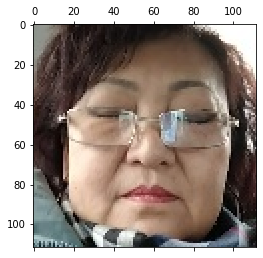

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/c357b89b-6df9-4880-a4b5-c2cf9822e007.mp4.0022.jpg
genome =  asian
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




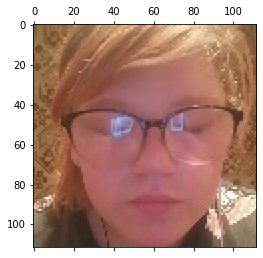

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/c088bec4-39a1-4fdf-bffd-8566cbaedd9a.mp4.0029.jpg
genome =  african
const_left =  4
eyes_left =  -5
const_right =  4
eyes_right =  -5




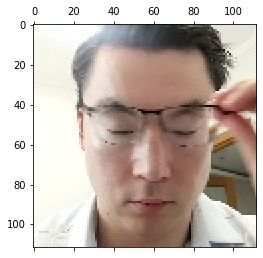

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/c030493c-5443-4340-aa30-0403eb495893.quicktime.0007.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




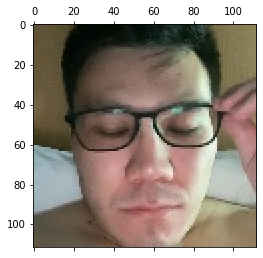

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d6b0019d-89ab-4215-b0d2-cc5bc55d3d4d.mp4.0006.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




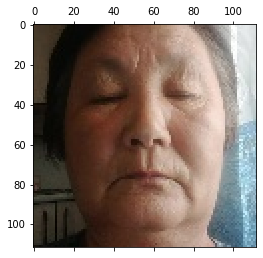

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d6a46d6d-de5b-479e-806d-aee7158dc3f1.mp4.0008.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




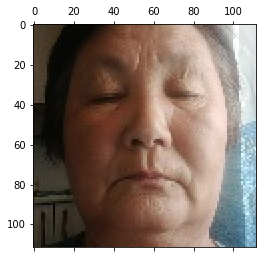

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d6a46d6d-de5b-479e-806d-aee7158dc3f1.mp4.0006.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




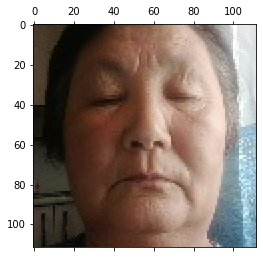

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d6a46d6d-de5b-479e-806d-aee7158dc3f1.mp4.0003.jpg
genome =  asian
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




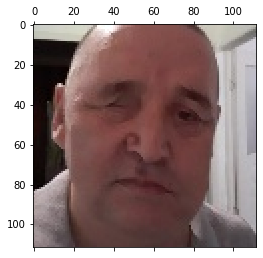

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d05b57f2-ec5f-45d1-8ada-f46ed2042351.mp4.0014.jpg
genome =  african
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  0




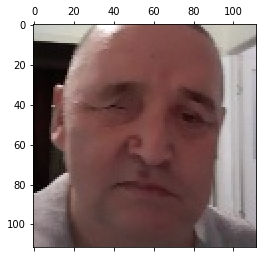

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d05b57f2-ec5f-45d1-8ada-f46ed2042351.mp4.0011.jpg
genome =  african
const_left =  3
eyes_left =  -5
const_right =  4
eyes_right =  0




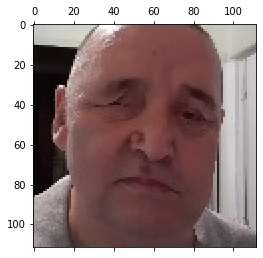

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d05b57f2-ec5f-45d1-8ada-f46ed2042351.mp4.0005.jpg
genome =  african
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  0




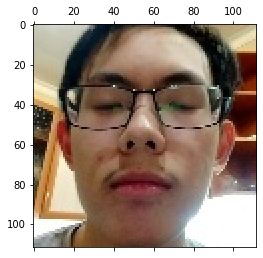

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/ccabf6fe-3d97-4303-85cd-9eeefc6ce496.quicktime.0014.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




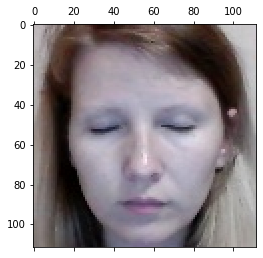

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/ddd617bc-8753-4dd0-a5c6-42b7a9d1e8a7.quicktime.0021.jpg
genome =  asian
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  -5




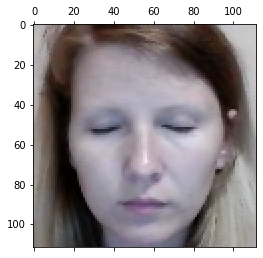

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/ddd617bc-8753-4dd0-a5c6-42b7a9d1e8a7.quicktime.0008.jpg
genome =  asian
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  -5




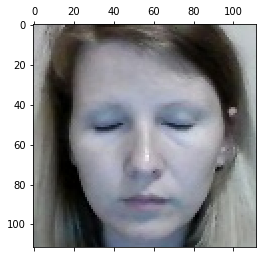

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/ddd617bc-8753-4dd0-a5c6-42b7a9d1e8a7.quicktime.0001.jpg
genome =  asian
const_left =  4
eyes_left =  -5
const_right =  5
eyes_right =  -5




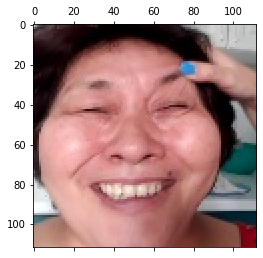

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/dda4cb28-4eee-4fc8-8b65-30b11dfc5163.quicktime.0017.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  4
eyes_right =  -5




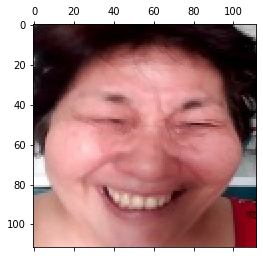

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/dda4cb28-4eee-4fc8-8b65-30b11dfc5163.quicktime.0004.jpg
genome =  asian
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




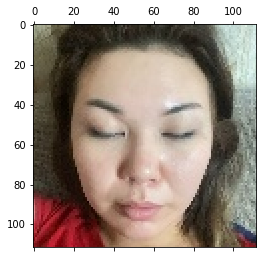

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/dd5addd5-e324-4cb0-8067-65a0ea27ca87.quicktime.0022.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




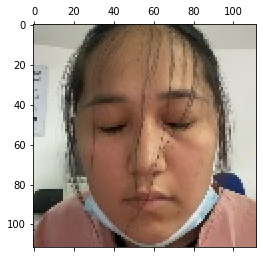

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/dbe8a5a7-7216-4467-9582-de91e422db96.mp4.0027.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  1
eyes_right =  -5




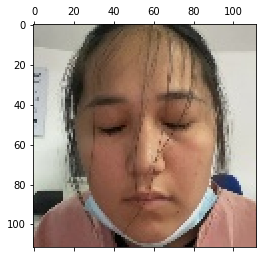

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/dbe8a5a7-7216-4467-9582-de91e422db96.mp4.0026.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




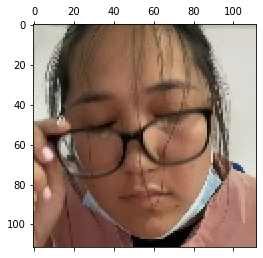

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/dbe8a5a7-7216-4467-9582-de91e422db96.mp4.0019.jpg
genome =  african
const_left =  1
eyes_left =  -5
const_right =  2
eyes_right =  -5




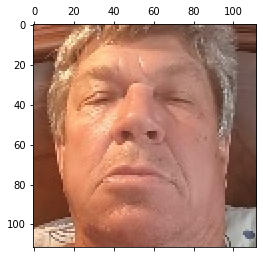

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/db4c0b44-c254-4b4e-b796-f529b972f8c0.mp4.0006.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  4
eyes_right =  -5




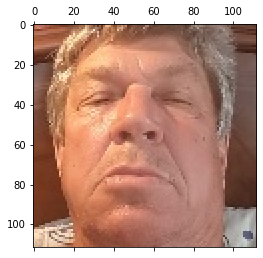

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/db4c0b44-c254-4b4e-b796-f529b972f8c0.mp4.0005.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




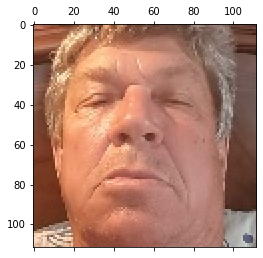

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/db4c0b44-c254-4b4e-b796-f529b972f8c0.mp4.0001.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  4
eyes_right =  -5




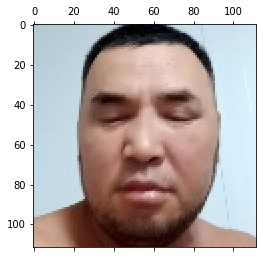

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/d227545b-ec87-4457-95a0-5c0e0e88cbe6.quicktime.0003.jpg
genome =  european
const_left =  1
eyes_left =  -5
const_right =  0
eyes_right =  -5




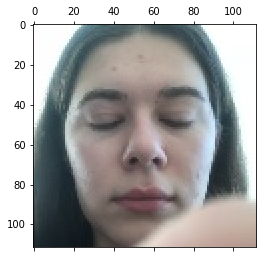

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/e34f2ab4-c004-4028-aa2f-4737aaf45dcf.mp4.0018.jpg
genome =  asian
const_left =  1
eyes_left =  -5
const_right =  1
eyes_right =  -5




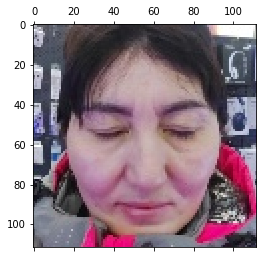

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/e2d7dde5-b1c7-447a-b396-757b7cb1bccf.mp4.0026.jpg
genome =  african
const_left =  0
eyes_left =  -5
const_right =  1
eyes_right =  -5




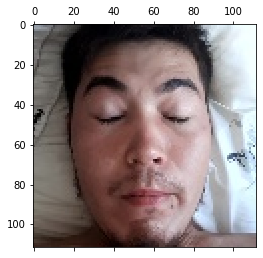

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/e17ffc9e-9663-4ee4-9a67-cf3328c85e1b.mp4.0030.jpg
genome =  asian
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




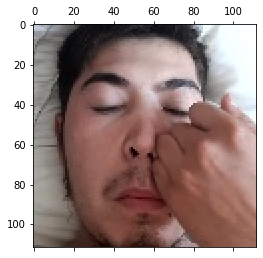

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/e17ffc9e-9663-4ee4-9a67-cf3328c85e1b.mp4.0020.jpg
genome =  asian
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




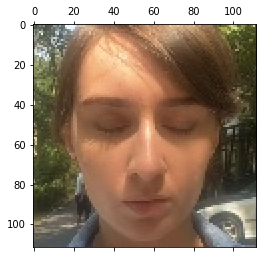

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/e12b32b0-3d01-455d-9023-1559c09a8982.mp4.0008.jpg
genome =  asian
const_left =  1
eyes_left =  -5
const_right =  1
eyes_right =  -5




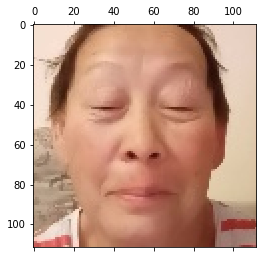

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/e0e5c38d-89d4-4f43-bee3-8956ea5174a4.mp4.0030.jpg
genome =  asian
const_left =  0
eyes_left =  -5
const_right =  0
eyes_right =  -5




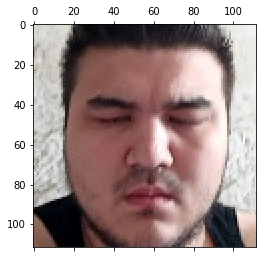

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/df8939f9-4890-4ce8-82df-350da581e285.quicktime.0029.jpg
genome =  asian
const_left =  1
eyes_left =  -5
const_right =  1
eyes_right =  -5




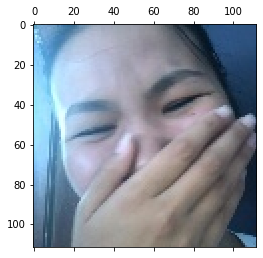

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/ed4021f0-6225-4d38-8b81-0c92682ac4ad.mp4.0022.jpg
genome =  asian
const_left =  4
eyes_left =  -5
const_right =  4
eyes_right =  -5




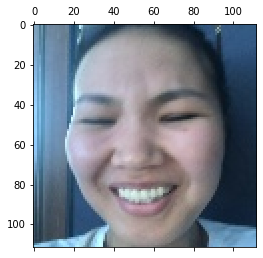

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/ed4021f0-6225-4d38-8b81-0c92682ac4ad.mp4.0017.jpg
genome =  asian
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




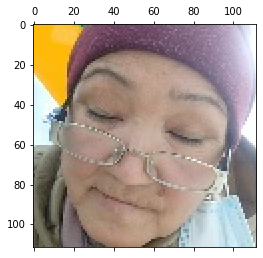

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/f7f5c39a-8bdb-4d36-85eb-0143a2cd6cfa.mp4.0024.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -5




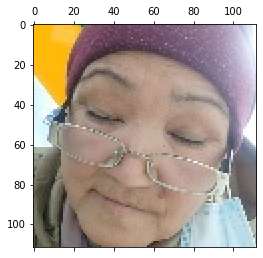

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/f7f5c39a-8bdb-4d36-85eb-0143a2cd6cfa.mp4.0022.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  2
eyes_right =  -5




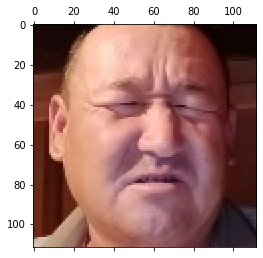

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/f61d467f-32f5-43b2-82c7-9efe7bad6c51.mp4.0007.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




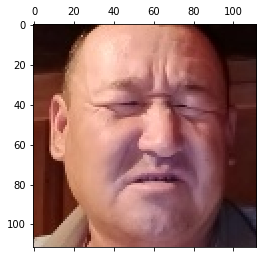

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/f61d467f-32f5-43b2-82c7-9efe7bad6c51.mp4.0003.jpg
genome =  european
const_left =  3
eyes_left =  -5
const_right =  3
eyes_right =  -5




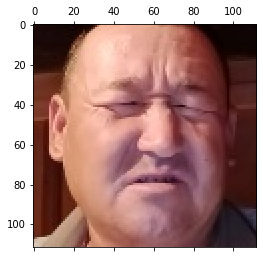

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/f61d467f-32f5-43b2-82c7-9efe7bad6c51.mp4.0002.jpg
genome =  european
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -5




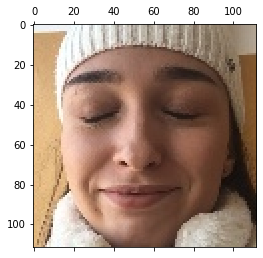

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/f48bdd92-9ba7-4373-9862-78f21b73d67e.mp4.0029.jpg
genome =  asian
const_left =  1
eyes_left =  -5
const_right =  2
eyes_right =  -5




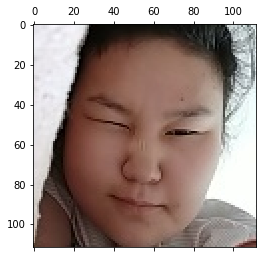

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/efb71614-0faf-4767-b2f5-a907379fa6d7.mp4.0030.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  3
eyes_right =  -2




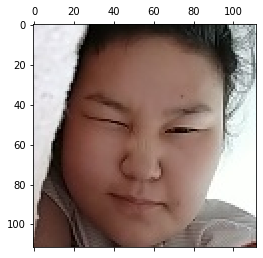

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/efb71614-0faf-4767-b2f5-a907379fa6d7.mp4.0029.jpg
genome =  african
const_left =  2
eyes_left =  -5
const_right =  2
eyes_right =  -2




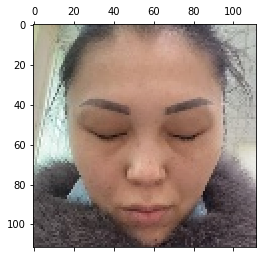

/mnt/data/frames/new_test/frames_6_origami_extended_0003_112/object_6/edd8d8d3-a8b5-4b45-b533-b67023a8290f.mp4.0018.jpg
genome =  african
const_left =  0
eyes_left =  -5
const_right =  0
eyes_right =  -5




In [34]:
for i,row in df_select[df_select['eyes_left']==-5].iterrows():

    file = row['filename']
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.matshow(img)
    plt.show()
    print(row['filename'])
    #print('object =', row['object'])
    #print('low_resolution =', row['low_resolution'])
    print('genome = ', row['genome'])
    print('const_left = ', row['const_left'])
    print('eyes_left = ', row['eyes_left'])
    print('const_right = ', row['const_right'])
    print('eyes_right = ', row['eyes_right'])
    print('\n')

In [30]:
#-2	Есть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)
# значения констант при данном тэге разметки (должны быть около 5 или меньше)
df_select[df_select['eyes_left']==-2]['const_left'].value_counts()

3    23
2    16
4    11
1     4
0     2
5     1
Name: const_left, dtype: int64

In [31]:
#1	Глаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие
# значения констант при данном тэге разметки (должны быть больше 5)
df_select[df_select['eyes_left']==1]['const_left'].value_counts()

5    7
6    5
2    1
8    1
7    1
9    1
4    1
Name: const_left, dtype: int64

In [32]:
#2	Глаза выпучены (могут идти в комплекте с поднятыми бровями)
# значения констант при данном тэге разметки (должны быть больше 5)
df_select[df_select['eyes_left']==2]['const_left'].value_counts()

6    5
7    1
Name: const_left, dtype: int64